In [45]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

In [46]:
tend = 470 * 24 * 60 * 60  #470 * 24 * 60 * 60 
dt = 60

In [47]:
bl = BatchLab(tend, dt)

In [48]:
# Bacteria:
bl.add_species(element='X_F', init_C=5e-4)
bl.add_species(element='X_N', init_C=1e-4)
bl.add_species(element='X_I', init_C=2e-5)
bl.add_species(element='X_S', init_C=2.5e-7)
bl.add_species(element='X_M', init_C=5e-9)

# ED
bl.add_species(element='C6H6O', init_C=10e-4)
bl.add_species(element='CH3COO', init_C=0)
bl.add_species(element='H2', init_C=0)
bl.add_species(element='TIC', init_C=2e-4)

k_fe = 0.15
k_mn = 0.15

# # EA
bl.add_species(element='NO3', init_C=2.9e-4)
bl.add_species(element='MNO2', init_C=4e-4 * k_mn)  # 50%)
bl.add_species(element='FEOOH', init_C=5e-3 * k_fe)  # 50%)
bl.add_species(element='SO4', init_C=7.6e-4)
bl.add_species(element='FEOOH_LR', init_C=5e-3 * (1 - k_fe))  # 50%)
bl.add_species(element='MNO2_LR', init_C=4e-4 * (1 - k_mn))  # 50%)

# # Reduced species:
bl.add_species(element='FE2', init_C=0)
bl.add_species(element='MN2', init_C=0)
bl.add_species(element='N2', init_C=0)
bl.add_species(element='H', init_C=0)
bl.add_species(element='HS', init_C=0)
bl.add_species(element='CH4', init_C=0)


# bl.add_species(element='Tracer', init_C=1)

In [49]:
# Half-saturation constants
bl.constants['K_M_C6H6O'] = 1.1e-4
bl.constants['K_M_CH3COO_N'] = 5e-4
bl.constants['K_M_CH3COO_MN'] = 5e-4
bl.constants['K_M_CH3COO_FE'] = 5e-4
bl.constants['K_M_CH3COO_S'] = 1e-4
bl.constants['K_M_CH3COO_TIC'] = 5e-4
bl.constants['K_M_NO3'] = 8.1e-6
bl.constants['K_M_SO4'] = 1.6e-4
bl.constants['K_M_H2_N'] = 1e-7
bl.constants['K_M_H2_MN'] = 5e-7
bl.constants['K_M_H2_FE'] = 5e-7
bl.constants['K_M_H2_S'] = 1e-6
bl.constants['K_M_H2_CH4'] = 5e-6

In [50]:
# inhibition terms

In [51]:
bl.constants['K_I_AC_NO3'] = 1.6e-5
bl.constants['K_I_AC_SO4'] = 1.6e-5
bl.constants['K_I_FEOOH_LR'] = 1e-6
bl.constants['K_I_FEOOH_MR_SO4'] = 1e-6  # changed from  1e-12
bl.constants['K_I_FEOOH_MR_MN'] = 1e-7  # changed from 1e-13
bl.constants['K_I_FEOOH_MR_FE'] = 1e-7
bl.constants['K_I_SO4_MN'] = 1e-5
bl.constants['K_I_SO4_FE'] = 1e-5

In [52]:
# rate constants

In [53]:
bl.constants['K_MAX_F'] = 3.8e-8
bl.constants['K_AC_MAX_N'] = 2e-5
bl.constants['K_AC_MAX_MN'] = 9e-8
bl.constants['K_AC_MAX_FE'] = 4.1e-7
bl.constants['K_AC_MAX_S'] = 1e-5
bl.constants['K_AC_MAX_CH4'] = 8e-7
bl.constants['K_H2_MAX_N'] = 1e-7
bl.constants['K_H2_MAX_MN'] = 1.1e-8
bl.constants['K_H2_MAX_FE'] = 5e-8
bl.constants['K_H2_MAX_S'] = 9e-8
bl.constants['K_H2_MAX_CH4'] = 1e-7

In [54]:
bl.rates['r_ferm'] = 'K_MAX_F * X_F * C6H6O / (K_M_C6H6O + C6H6O)'
bl.rates['r_a1'] = 'K_AC_MAX_N * X_N * CH3COO / (CH3COO + K_M_CH3COO_N) * NO3 / (NO3 + K_M_NO3)'
bl.rates['r_a2'] = 'K_AC_MAX_MN * X_I * CH3COO / (CH3COO + K_M_CH3COO_MN) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a3'] = 'K_AC_MAX_FE * X_I * CH3COO / (CH3COO + K_M_CH3COO_FE) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a4'] = 'K_AC_MAX_S * X_S * CH3COO / (CH3COO + K_M_CH3COO_S) * SO4 / (SO4 + K_M_SO4) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3)'
bl.rates['r_a5'] = 'K_AC_MAX_CH4 * X_M * CH3COO / (CH3COO + K_M_CH3COO_TIC) * K_I_AC_NO3 / (NO3 + K_I_AC_NO3) * K_I_AC_SO4 / (SO4 + K_I_AC_SO4)'
bl.rates['r_h1'] = 'K_H2_MAX_N * H2 / (H2 + K_M_H2_N) * NO3 / (NO3 + K_M_NO3)'
bl.rates['r_h2'] = 'K_H2_MAX_MN * H2 / (H2 + K_M_H2_MN)'
bl.rates['r_h3'] = 'K_H2_MAX_FE * H2 / (H2 + K_M_H2_FE)'
bl.rates['r_h4'] = 'K_H2_MAX_S * H2 / (H2 + K_M_H2_S) * SO4 / (SO4 + K_M_SO4) * K_I_FEOOH_MR_SO4 / (K_I_FEOOH_MR_SO4 + FEOOH)'
bl.rates['r_h2b'] = 'K_H2_MAX_MN * H2 / (H2 + K_M_H2_MN) * K_I_FEOOH_MR_MN / (K_I_FEOOH_MR_MN + FEOOH) * K_I_SO4_MN / (K_I_SO4_MN + SO4)'
bl.rates['r_h3b'] = 'K_H2_MAX_FE * H2 / (H2 + K_M_H2_FE) * K_I_FEOOH_MR_FE / (K_I_FEOOH_MR_FE + FEOOH) * K_I_SO4_FE / (K_I_SO4_FE + SO4)'
bl.rates['r_h5'] = 'K_H2_MAX_CH4 * H2 / (H2 + K_M_H2_CH4) * K_I_FEOOH_LR / (K_I_FEOOH_LR + FEOOH_LR)'
# bl.rates['r_t'] = 'Tracer'

In [55]:
bl.dcdt['X_F'] = '1.2 * r_ferm'
bl.dcdt['X_N'] = '0.4 * r_a1'
bl.dcdt['X_I'] = '1.2 * r_a2 + 1.2 * r_a3'
bl.dcdt['X_S'] = '0.1 * r_a4'
bl.dcdt['C6H6O'] = '-r_ferm'
bl.dcdt['CH3COO'] = '2.4 * r_ferm - r_a1 - r_a2 - r_a3 - r_a4 - r_a5'
bl.dcdt['H2'] = '2 * r_ferm - r_h1 - r_h2 - r_h2b - r_h3 - r_h3b - r_h4 - r_h5'
bl.dcdt['TIC'] = '1.6 * r_a1 + 0.8 * r_a2 + 0.8 * r_a3 + 1.9 * r_a4 + 0.6 * r_a5 - 0.25 * r_h5'
bl.dcdt['NO3'] = '- 1.28 * r_a1 - 0.4 * r_h1'
bl.dcdt['MNO2'] = '- r_h2'
bl.dcdt['FEOOH'] = '- 2 * r_h3'
bl.dcdt['SO4'] = '-0.95 * r_a4 - 0.25 * r_h4'
bl.dcdt['FE2'] = '3.2 * r_a3 + 2 * r_h3 + 2 * r_h3b'
bl.dcdt['MN2'] = '1.6 * r_a2 + r_h2 + r_h2b'
bl.dcdt['N2'] = '0.64 * r_a1 + 0.2 * r_h1'
bl.dcdt['H'] = '0'
bl.dcdt['HS'] = '0.95 * r_a4 + 0.25 * r_h4'
bl.dcdt['CH4'] = '0.6 * r_a5 + 0.25 * r_h5'
bl.dcdt['X_M'] = '0.8 * r_a5'
bl.dcdt['FEOOH_LR']  ='- r_h3b - 3.2 * r_a3'
bl.dcdt['MNO2_LR']  ='- r_h2b - 1.6 * r_a2'
# bl.dcdt['Tracer']  ='- 1e-5 * r_t'

In [56]:
bl.solve()

Simulation started:
	 2017-09-13 17:00:53


Estimated time of the code execution:
	 1h:13m:21s
Will finish approx.:
	 2017-09-13 18:14:15


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


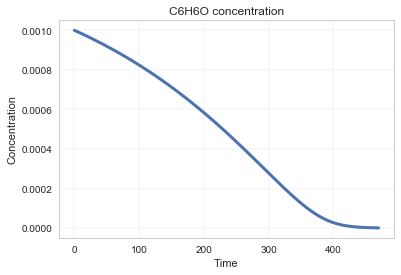

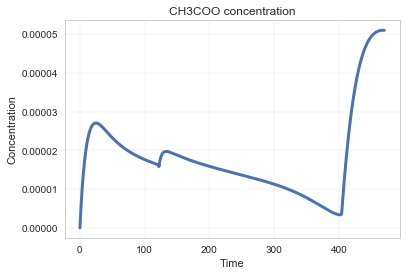

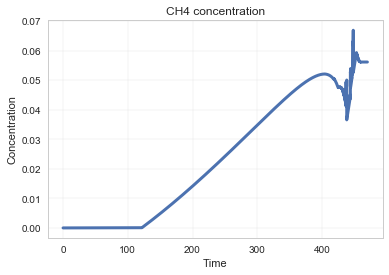

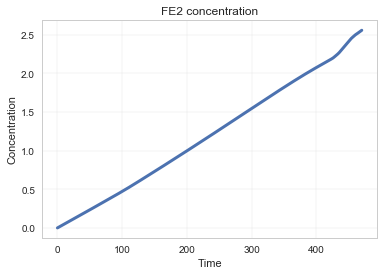

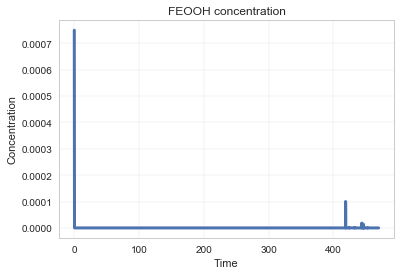

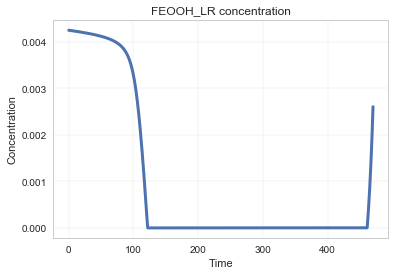

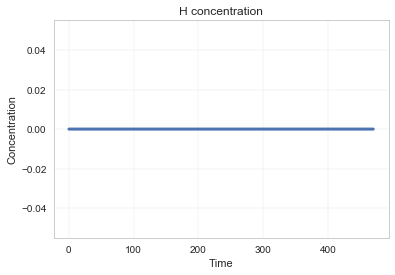

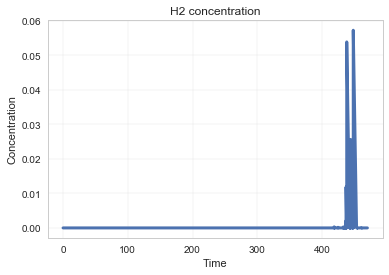

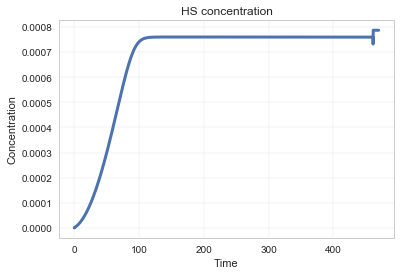

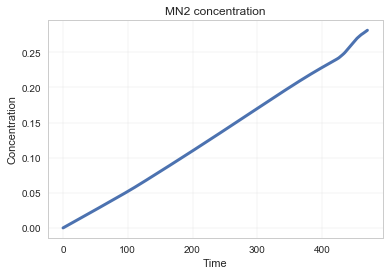

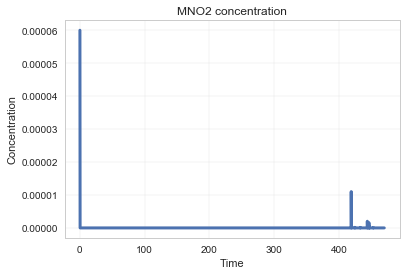

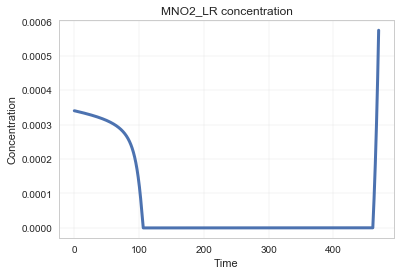

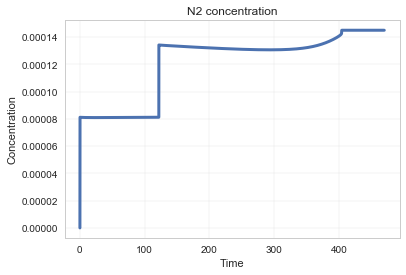

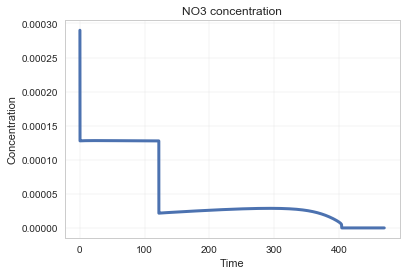

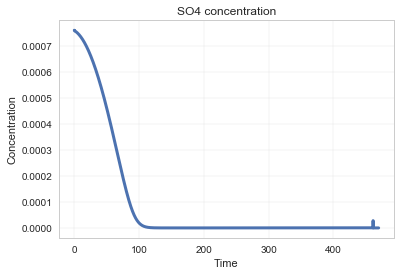

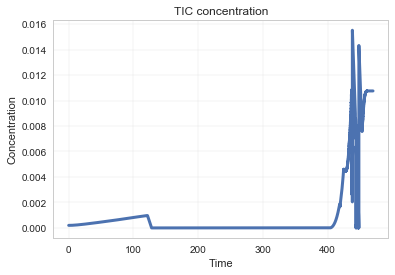

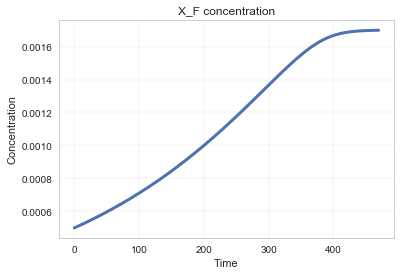

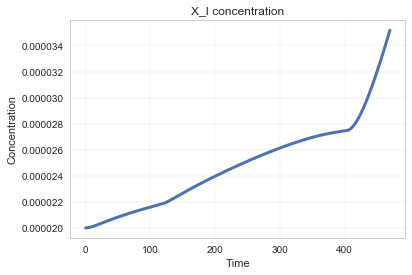

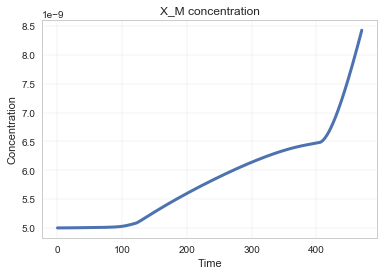

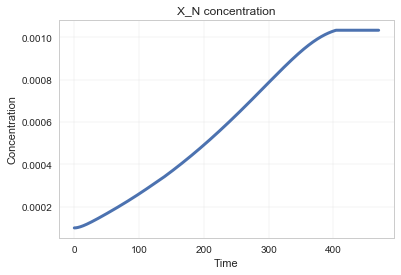

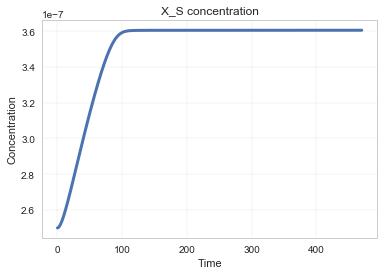

In [57]:
bl.plot_profiles(time_factor=1/24/60/60)

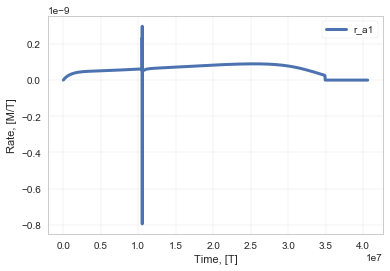

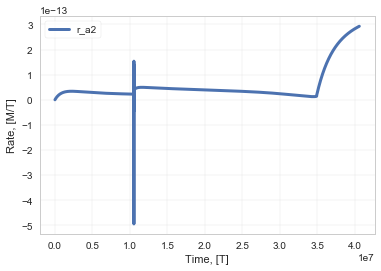

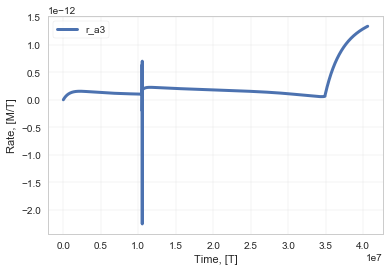

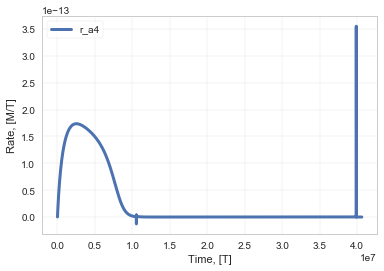

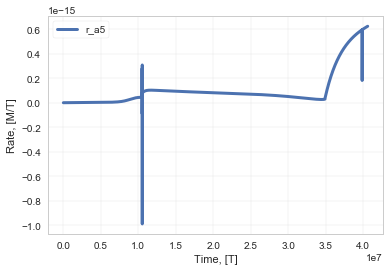

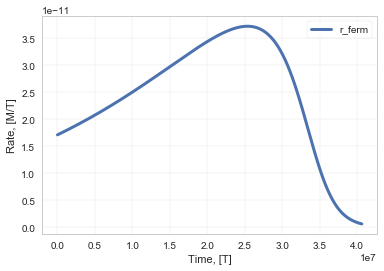

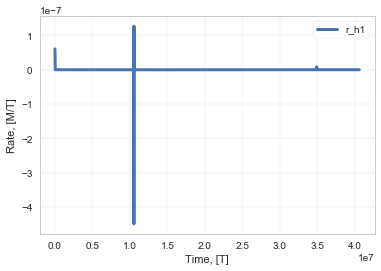

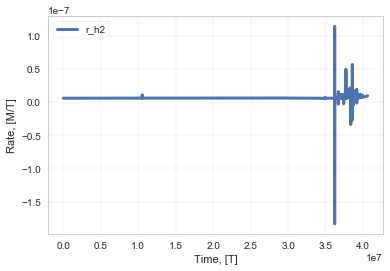

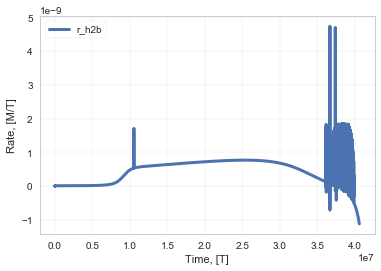

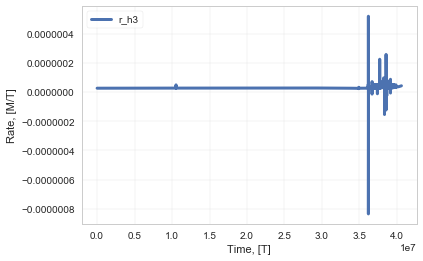

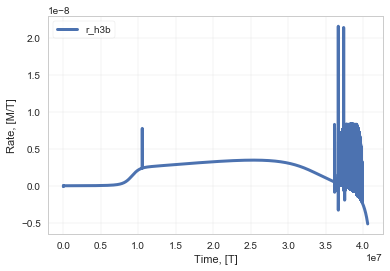

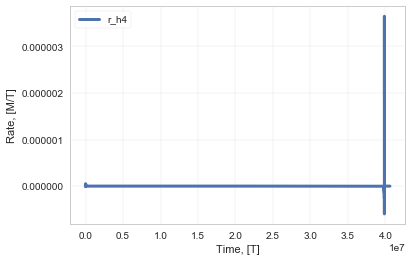

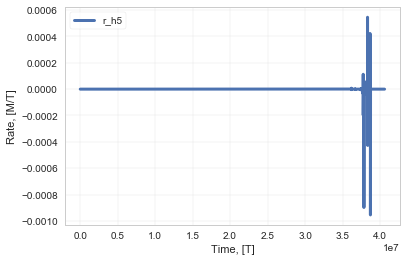

In [58]:
bl.plot_rates()

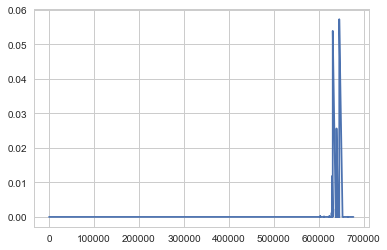

In [59]:
plt.plot(bl.species['H2']['concentration'][0])